In [1]:
# 安裝相關套件
!pip install  tensorflow
!pip install numpy
!pip install panda

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
# 引用相關套件
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [3]:
# 下載衣服的訓練和測試資料
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# 產生Label對應的類別名稱集合
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# 建立訓練模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# 進行模型訓練
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 2.7227 - accuracy: 0.7115
Epoch 2/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.5914 - accuracy: 0.7946
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5388 - accuracy: 0.8140
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5179 - accuracy: 0.8215
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4939 - accuracy: 0.8327
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4996 - accuracy: 0.8295
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4852 - accuracy: 0.8340
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4770 - accuracy: 0.8395
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4649 - accuracy: 0.8420
Epoch 10/10
60

==============測試資料=======================
測試資料 Label => 9
測試資料 類別名稱 => Ankle boot


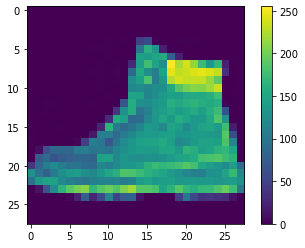

==============預測結果=======================
預測結果 Label => 9
測試結果 類別名稱 => Ankle boot
confidence Value => 0.9688859581947327


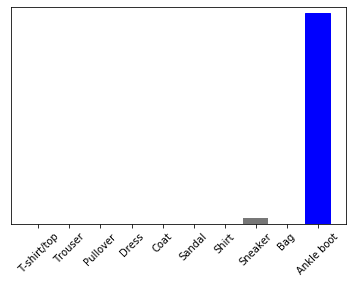

In [13]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
def predict_single_image(i):
    # Grab an image from the test dataset.
    img = test_images[i]
    print('==============測試資料=======================')
    print('測試資料 Label => {}'.format(test_labels[i]))
    print('測試資料 類別名稱 => {}'.format(class_names[test_labels[i]]))

    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print('==============預測結果=======================')
    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img,0))
    predictions_single = probability_model.predict(img)
    print('預測結果 Label => {}'.format(np.argmax(predictions_single[0])))
    print('測試結果 類別名稱 => {}'.format(class_names[np.argmax(predictions_single[0])]))

    print('confidence Value => {}'.format(predictions_single[0][np.argmax(predictions_single[0])]))

    plot_value_array(i, predictions_single[0], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    
        
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predict_single_image(203)